# Dataset Exploration

## Setup

In [5]:
import pandas as pd
import numpy as np
import sklearn


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading the dataset

In [6]:
covidData = pd.read_csv('../data/covid_data.csv')

In [7]:
covidData.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383502 entries, 0 to 383501
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    383502 non-null  object 
 1   continent                                   365255 non-null  object 
 2   location                                    383502 non-null  object 
 3   date                                        383502 non-null  object 
 4   total_cases                                 344917 non-null  float64
 5   new_cases                                   372892 non-null  float64
 6   new_cases_smoothed                          371662 non-null  float64
 7   total_deaths                                322777 non-null  float64
 8   new_deaths                                  373187 non-null  float64
 9   new_deaths_smoothed                         371957 non-null  float64
 

There is a total of 67 attributes in the Data Set. It includes the following:

| column                                     | source                                                                                                                            | category           | description                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- | ------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| iso_code                                   | International Organization for Standardization                                                                                    | Others             | ISO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID_'.                                                                                                                                                                                                                                                                                                                               |
| continent                                  | Our World in Data                                                                                                                 | Others             | Continent of the geographical location                                                                                                                                                                                                                                                                                                                                                                                                                                |
| location                                   | Our World in Data                                                                                                                 | Others             | Geographical location                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| date                                       | Our World in Data                                                                                                                 | Others             | Date of observation                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| total_cases                                | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | Total confirmed cases of COVID-19. Counts can include probable cases, where reported.                                                                                                                                                                                                                                                                                                                                                                                 |
| new_cases                                  | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.                                                                                                                                                                                                                                                                |
| new_cases_smoothed                         | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported.                                                                                                                                                                                                                                                                                                                                                                  |
| total_deaths                               | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                                                                                                                                              |
| new_deaths                                 | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.                                                                                                                                                                                                                                                             |
| new_deaths_smoothed                        | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                                                                                                                               |
| total_cases_per_million                    | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                                                                                                                                                            |
| new_cases_per_million                      | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | New confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                                                                                                                                                              |
| new_cases_smoothed_per_million             | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed cases    | New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                                                                                                                                             |
| total_deaths_per_million                   | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                                                                                                                         |
| new_deaths_per_million                     | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                                                                                                                           |
| new_deaths_smoothed_per_million            | COVID-19 Dashboard by the WHO                                                                                                     | Confirmed deaths   | New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                                                                                                          |
| reproduction_rate                          | Arroyo Marioli et al. (2020). https://doi.org/10.2139/ssrn.3581633                                                                | Reproduction rate  | Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database                                                                                                                                                                                                                                                                                                                         |
| icu_patients                               | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients in intensive care units (ICUs) on a given day                                                                                                                                                                                                                                                                                                                                                                                             |
| icu_patients_per_million                   | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people                                                                                                                                                                                                                                                                                                                                                                        |
| hosp_patients                              | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients in hospital on a given day                                                                                                                                                                                                                                                                                                                                                                                                                |
| hosp_patients_per_million                  | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients in hospital on a given day per 1,000,000 people                                                                                                                                                                                                                                                                                                                                                                                           |
| weekly_icu_admissions                      | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week (reporting date and the preceeding 6 days)                                                                                                                                                                                                                                                                                                                                  |
| weekly_icu_admissions_per_million          | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people (reporting date and the preceeding 6 days)                                                                                                                                                                                                                                                                                                             |
| weekly_hosp_admissions                     | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients newly admitted to hospitals in a given week (reporting date and the preceeding 6 days)                                                                                                                                                                                                                                                                                                                                                    |
| weekly_hosp_admissions_per_million         | National government reports and European CDC                                                                                      | Hospital & ICU     | Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people (reporting date and the preceeding 6 days)                                                                                                                                                                                                                                                                                                                               |
| total_tests                                | National government reports                                                                                                       | Tests & positivity | Total tests for COVID-19                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| new_tests                                  | National government reports                                                                                                       | Tests & positivity | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                                                                                                                                         |
| total_tests_per_thousand                   | National government reports                                                                                                       | Tests & positivity | Total tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                                                                                                                                             |
| new_tests_per_thousand                     | National government reports                                                                                                       | Tests & positivity | New tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                                                                                                                                               |
| new_tests_smoothed                         | National government reports                                                                                                       | Tests & positivity | New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window                                                                                                                                                  |
| new_tests_smoothed_per_thousand            | National government reports                                                                                                       | Tests & positivity | New tests for COVID-19 (7-day smoothed) per 1,000 people                                                                                                                                                                                                                                                                                                                                                                                                              |
| positive_rate                              | National government reports                                                                                                       | Tests & positivity | The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)                                                                                                                                                                                                                                                                                                                                               |
| tests_per_case                             | National government reports                                                                                                       | Tests & positivity | Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)                                                                                                                                                                                                                                                                                                                                           |
| tests_units                                | National government reports                                                                                                       | Tests & positivity | Units used by the location to report its testing data. A country file can't contain mixed units. All metrics concerning testing data use the specified test unit. Valid units are 'people tested' (number of people tested), 'tests performed' (number of tests performed. a single person can be tested more than once in a given day) and 'samples tested' (number of samples tested. In some cases, more than one sample may be required to perform a given test.) |
| total_vaccinations                         | National government reports                                                                                                       | Vaccinations       | Total number of COVID-19 vaccination doses administered                                                                                                                                                                                                                                                                                                                                                                                                               |
| people_vaccinated                          | National government reports                                                                                                       | Vaccinations       | Total number of people who received at least one vaccine dose                                                                                                                                                                                                                                                                                                                                                                                                         |
| people_fully_vaccinated                    | National government reports                                                                                                       | Vaccinations       | Total number of people who received all doses prescribed by the initial vaccination protocol                                                                                                                                                                                                                                                                                                                                                                          |
| total_boosters                             | National government reports                                                                                                       | Vaccinations       | Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)                                                                                                                                                                                                                                                                                                                         |
| new_vaccinations                           | National government reports                                                                                                       | Vaccinations       | New COVID-19 vaccination doses administered (only calculated for consecutive days)                                                                                                                                                                                                                                                                                                                                                                                    |
| new_vaccinations_smoothed                  | National government reports                                                                                                       | Vaccinations       | New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window                                                                                                                     |
| total_vaccinations_per_hundred             | National government reports                                                                                                       | Vaccinations       | Total number of COVID-19 vaccination doses administered per 100 people in the total population                                                                                                                                                                                                                                                                                                                                                                        |
| people_vaccinated_per_hundred              | National government reports                                                                                                       | Vaccinations       | Total number of people who received at least one vaccine dose per 100 people in the total population                                                                                                                                                                                                                                                                                                                                                                  |
| people_fully_vaccinated_per_hundred        | National government reports                                                                                                       | Vaccinations       | Total number of people who received all doses prescribed by the initial vaccination protocol per 100 people in the total population                                                                                                                                                                                                                                                                                                                                   |
| total_boosters_per_hundred                 | National government reports                                                                                                       | Vaccinations       | Total number of COVID-19 vaccination booster doses administered per 100 people in the total population                                                                                                                                                                                                                                                                                                                                                                |
| new_vaccinations_smoothed_per_million      | National government reports                                                                                                       | Vaccinations       | New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population                                                                                                                                                                                                                                                                                                                                                             |
| new_people_vaccinated_smoothed             | National government reports                                                                                                       | Vaccinations       | Daily number of people receiving their first vaccine dose (7-day smoothed)                                                                                                                                                                                                                                                                                                                                                                                            |
| new_people_vaccinated_smoothed_per_hundred | National government reports                                                                                                       | Vaccinations       | Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population                                                                                                                                                                                                                                                                                                                                                     |
| stringency_index                           | Oxford COVID-19 Government Response Tracker, Blavatnik School of Government                                                       | Policy responses   | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                                                                                                                                                   |
| population                                 | United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects 2019 Revision          | Others             | Population (latest available values). See https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv for full list of sources                                                                                                                                                                                                                                                                                                           |
| population_density                         | World Bank World Development Indicators, sourced from Food and Agriculture Organization and World Bank estimates                  | Others             | Number of people divided by land area, measured in square kilometers, most recent year available                                                                                                                                                                                                                                                                                                                                                                      |
| median_age                                 | UN Population Division, World Population Prospects, 2017 Revision                                                                 | Others             | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                                                                                                                                                  |
| aged_65_older                              | World Bank World Development Indicators based on age/sex distributions of United Nations World Population Prospects 2017 Revision | Others             | Share of the population that is 65 years and older, most recent year available                                                                                                                                                                                                                                                                                                                                                                                        |
| aged_70_older                              | United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects 2017 Revision   | Others             | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                                                                                                                                            |
| gdp_per_capita                             | World Bank World Development Indicators, source from World Bank, International Comparison Program database                        | Others             | Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available                                                                                                                                                                                                                                                                                                                                                   |
| extreme_poverty                            | World Bank World Development Indicators, sourced from World Bank Development Research Group                                       | Others             | Share of the population living in extreme poverty, most recent year available since 2010                                                                                                                                                                                                                                                                                                                                                                              |
| cardiovasc_death_rate                      | Global Burden of Disease Collaborative Network, Global Burden of Disease Study 2017 Results                                       | Others             | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                                                                                                                                                                                                                                                           |
| diabetes_prevalence                        | World Bank World Development Indicators, sourced from International Diabetes Federation, Diabetes Atlas                           | Others             | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                                                                                                                                           |
| female_smokers                             | World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository        | Others             | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                                                                                                                                                  |
| male_smokers                               | World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository        | Others             | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                                                                                                                                    |
| handwashing_facilities                     | United Nations Statistics Division                                                                                                | Others             | Share of the population with basic handwashing facilities on premises, most recent year available                                                                                                                                                                                                                                                                                                                                                                     |
| hospital_beds_per_thousand                 | OECD, Eurostat, World Bank, national government records and other sources                                                         | Others             | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                                                                                                                                                 |
| life_expectancy                            | James C. Riley, Clio Infra, United Nations Population Division                                                                    | Others             | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| human_development_index                    | United Nations Development Programme (UNDP)                                                                                       | Others             | A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506                                                                                                                                                                                                                            |
| excess_mortality                           | Human Mortality Database (2021), World Mortality Dataset (2021)                                                                   | Excess mortality   | Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                                                                                                                                   |
| excess_mortality_cumulative                | Human Mortality Database (2021), World Mortality Dataset (2021)                                                                   | Excess mortality   | Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                                                                                                                                          |
| excess_mortality_cumulative_absolute       | Human Mortality Database (2021), World Mortality Dataset (2021)                                                                   | Excess mortality   | Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                                                                                                                                             |
| excess_mortality_cumulative_per_million    | Human Mortality Database (2021), World Mortality Dataset (2021)                                                                   | Excess mortality   | Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years, per million people. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                                                                                                                         |

In [9]:
covidData.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.449170e+05,3.728920e+05,3.716620e+05,3.227770e+05,373187.000000,371957.000000,344917.000000,372892.000000,371662.000000,322777.000000,...,220416.000000,145928.000000,262976.000000,353251.000000,288787.000000,3.835020e+05,1.312100e+04,13121.000000,13121.000000,13121.000000
mean,7.326390e+06,8.806241e+03,8.835211e+03,8.961679e+04,78.804846,79.064820,111435.377291,133.741952,134.179450,914.290203,...,32.909604,50.790147,3.096997,73.709807,0.722482,1.283993e+08,5.460576e+04,9.752607,10.984338,1769.376469
std,4.371243e+07,2.407898e+05,9.079252e+04,4.552421e+05,1430.938900,536.766654,159315.210168,1551.258325,573.993544,1128.939626,...,13.574462,31.957131,2.548347,7.395571,0.148993,6.604474e+08,1.512947e+05,11.970158,24.561162,1986.681517
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.251000e+03,0.000000e+00,0.000000e+00,1.350000e+02,0.000000,0.000000,2936.913000,0.000000,0.000000,65.154000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.724999e+02,2.000000,-1.520000,116.117455
50%,7.870000e+04,0.000000e+00,1.757100e+01,1.390000e+03,0.000000,0.143000,32178.218000,0.000000,4.379000,408.723000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.668000e+03,8.150000,5.650000,1241.424700
75%,8.414690e+05,0.000000e+00,4.115710e+02,1.251700e+04,0.000000,4.143000,154388.893000,0.000000,69.551000,1452.586000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.875749e+04,15.060000,15.720000,2870.667500
max,7.747865e+08,4.423623e+07,6.319461e+06,7.034255e+06,103719.000000,14817.000000,764960.958000,240325.866000,34332.267000,6482.663000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.327828e+06,76.620000,377.700000,10293.515000


## Initial Conclusions

- 5 out of 67 attributes are represented as objects:
    - iso_code
    
    - continent

    - location

    - date
    
    - tests_units

- 62 out of 67 (the rest) are represented as floats

- There are 383502 entries in total, and most attributes have missing values.
    - Complete attributes(no missing values) include:
        - iso_code

        - location

        - date
        
        - population

## Statistical Analysis

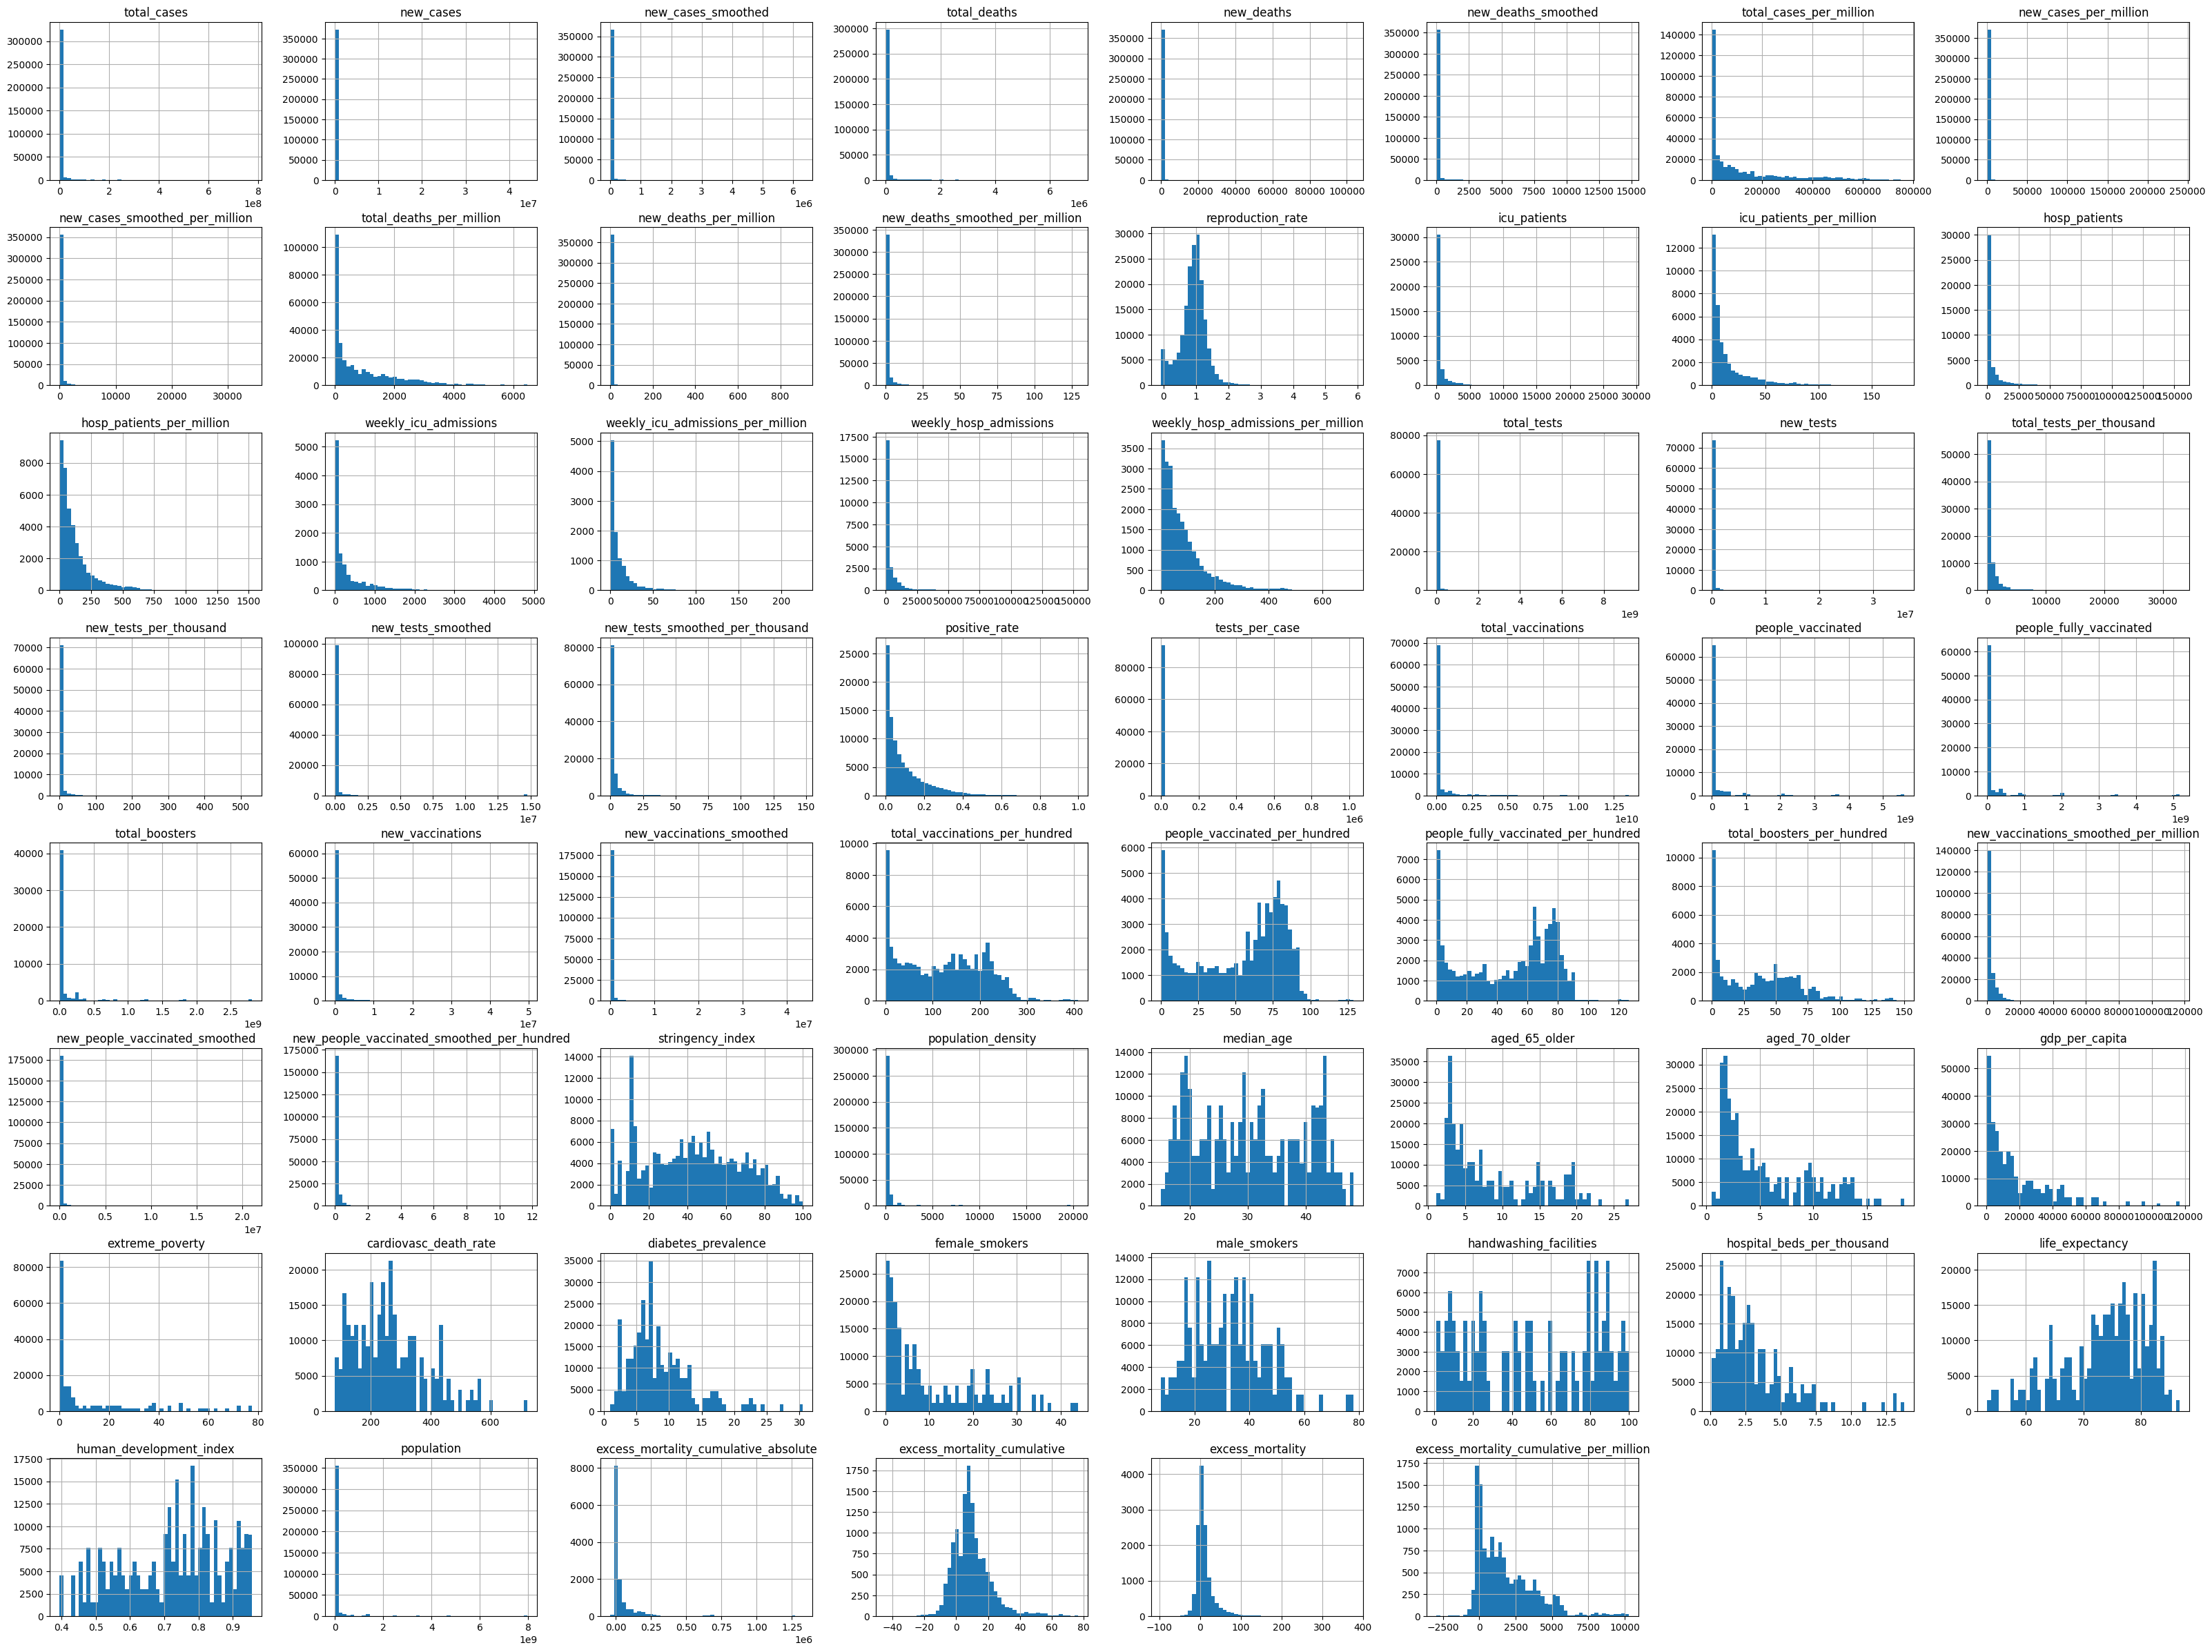

In [10]:
# Plot a histogram for each numerical attribute
covidData.hist(bins=50, figsize=(40,30))
plt.show()

In [11]:
# The number of unique values for iso_code in dataset
covidData["iso_code"].value_counts()

iso_code
MEX         1524
ARG         1524
OWID_EUR    1521
OWID_ASI    1521
SWE         1521
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

In [12]:
# The number of unique values for continents in dataset
covidData["continent"].value_counts()

continent
Africa           86641
Europe           82757
Asia             75769
North America    62324
Oceania          36480
South America    21284
Name: count, dtype: int64

In [13]:
# The number of unique values for coutries in dataset
covidData["location"].value_counts()

location
Mexico             1524
Argentina          1524
Europe             1521
Asia               1521
Sweden             1521
                   ... 
Scotland           1305
Wales              1198
Macao               795
Northern Cyprus     691
Western Sahara        1
Name: count, Length: 255, dtype: int64

In [14]:
# The number of unique values for dates in dataset
covidData["date"].value_counts()

date
2022-04-20    255
2021-12-20    254
2021-12-06    254
2021-12-07    254
2021-12-08    254
             ... 
2024-03-04     13
2020-01-04      3
2020-01-01      2
2020-01-02      2
2020-01-03      2
Name: count, Length: 1525, dtype: int64

In [15]:
# The number of unique values for tests_units(unit used for measuring COVID testing) in dataset
covidData["tests_units"].value_counts()

tests_units
tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: count, dtype: int64

In [16]:
# Comparing attributes iso_code & location
covidData["location"].value_counts().values.__eq__(covidData["iso_code"].value_counts().values)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Observations

##### **From Histograms(for numeric attributes):**

- Due to a lot of missing values, most of the above histograms peak at 0. Bars of existing values are extremely minimised compared to the number of 0s and cannot be seen.

##### **For Non-numeric attrbutes:**

- iso_code
    - There are 255 unique ISO codes in the dataset,
    - with the most data entries belonging to MEX(Mexico) & ARG(Argentina) = 1524 entries.
    
- continent
    - Highest number of data entries: Africa
    - Lowest number of data entries: South America

- location
    - This attribute is the name of the country
    - Comparing this attribute with *iso_code* shows both the attributes contain the same data

- date
    - ***2022-04-20*** contains the most data entries

- tests_units
    - ***tests performed*** is the most popular unit for COVID testing
    - There are 841 entries with unclear units of testing

## Finding Patterns/Trends in Our Data

#### Total number of cases in each continent per year

In [17]:
# years in dataset
years = covidData['date'].apply(lambda x: x[0:4]).value_counts().sort_index()

In [18]:
years

date
2020    90907
2021    92659
2022    92685
2023    91680
2024    15571
Name: count, dtype: int64

In [19]:
years = years.index.to_list()

In [20]:
years

['2020', '2021', '2022', '2023', '2024']

Our dataset contains data for 2020 to 2024.

In [21]:
cases_per_continent20 = covidData.groupby(covidData['continent'])['total_cases'].sum()

In [22]:
cases_per_continent20

continent
Africa           1.259280e+10
Asia             2.057467e+11
Europe           1.978563e+11
North America    1.079192e+11
Oceania          9.298856e+09
South America    6.288206e+10
Name: total_cases, dtype: float64

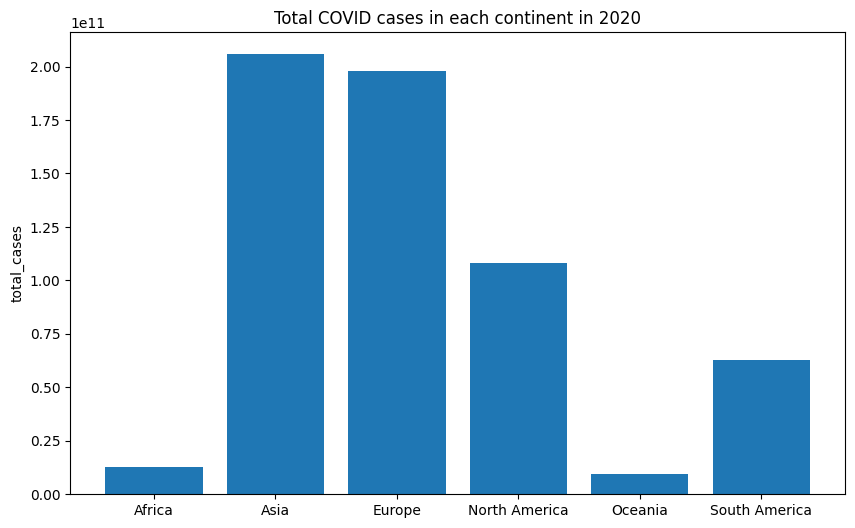

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))

countries = cases_per_continent20.index.to_list()
counts = cases_per_continent20.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts)

ax.set_ylabel('total_cases')
ax.set_title('Total COVID cases in each continent in 2020')
# ax.legend(title='Fruit color')

plt.show()

NameError: name 'cases_per_continent21' is not defined

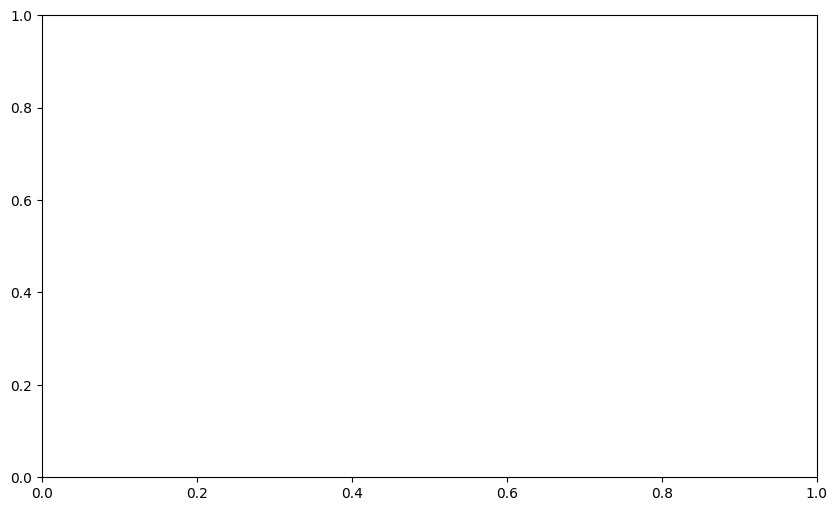

In [25]:
fig, ax = plt.subplots(figsize = (10, 6))

countries = cases_per_continent21.index.to_list()
counts = cases_per_continent21.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts)

ax.set_ylabel('total_cases')
ax.set_title('Total COVID cases in each continent in 2021')
# ax.legend(title='Fruit color')

plt.show()

NameError: name 'cases_per_continent22' is not defined

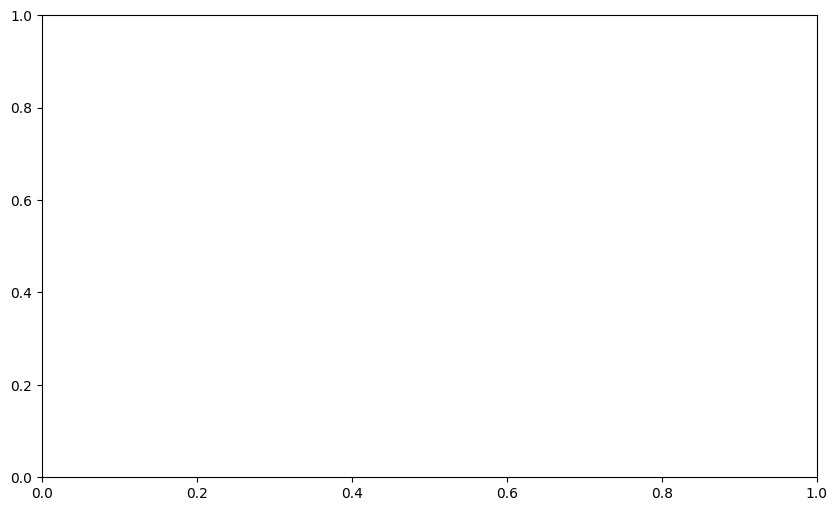

In [26]:
fig, ax = plt.subplots(figsize = (10, 6))

countries = cases_per_continent22.index.to_list()
counts = cases_per_continent22.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts)

ax.set_ylabel('total_cases')
ax.set_title('Total COVID cases in each continent in 2022')
# ax.legend(title='Fruit color')

plt.show()

NameError: name 'cases_per_continent23' is not defined

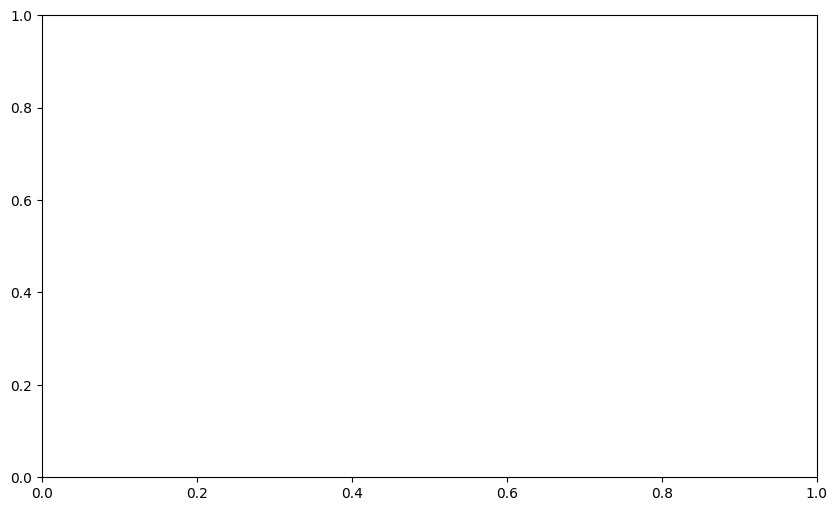

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))

countries = cases_per_continent23.index.to_list()
counts = cases_per_continent23.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts)

ax.set_ylabel('total_cases')
ax.set_title('Total COVID cases in each continent in 2023')
# ax.legend(title='Fruit color')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

countries = cases_per_continent24.index.to_list()
counts = cases_per_continent24.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts)

ax.set_ylabel('total_cases')
ax.set_title('Total COVID cases in each continent in 2024')
# ax.legend(title='Fruit color')

plt.show()

In [28]:
covidData['continent'].value_counts().index.to_list()

['Africa', 'Europe', 'Asia', 'North America', 'Oceania', 'South America']

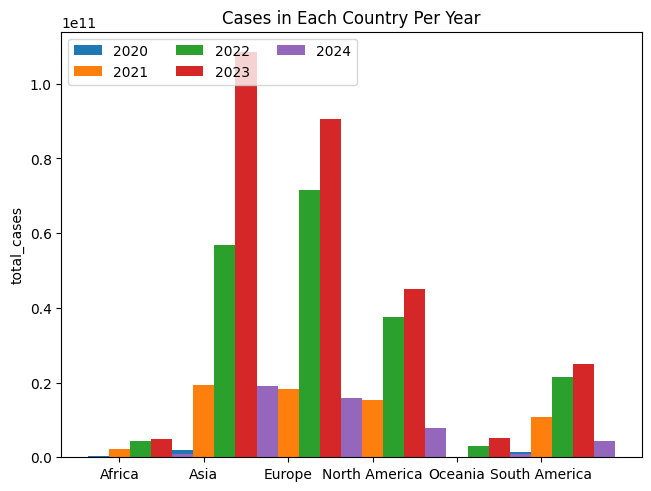

In [29]:
continents = covidData['continent'].value_counts().index.to_list()
cases_per_continent20 = covidData.loc[covidData['date'].str.startswith('2020')].groupby(covidData['continent'])['total_cases'].sum()
cases_per_continent21 = covidData.loc[covidData['date'].str.startswith('2021')].groupby(covidData['continent'])['total_cases'].sum()
cases_per_continent22 = covidData.loc[covidData['date'].str.startswith('2022')].groupby(covidData['continent'])['total_cases'].sum()
cases_per_continent23 = covidData.loc[covidData['date'].str.startswith('2023')].groupby(covidData['continent'])['total_cases'].sum()
cases_per_continent24 = covidData.loc[covidData['date'].str.startswith('2024')].groupby(covidData['continent'])['total_cases'].sum()

yearly_cases = {
    2020: cases_per_continent20,
    2021: cases_per_continent21,
    2022: cases_per_continent22,
    2023: cases_per_continent23,
    2024: cases_per_continent24
}

x = np.arange(len(countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in yearly_cases.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total_cases')
ax.set_title('Cases in Each Country Per Year')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)

plt.show()

## Finding last date of entry containing all countries' data for each year: 

- 2020

- 2021

- 2022

- 2023

- 2024

For visualisations showing yearly trend of data, these dates will be used.

#### Dataset with ISO 3166-1 codes

In [30]:
iso_codes = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
iso_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#### Checking only alpha-3 iso codes as that's the one in our dataset.

In [31]:
iso_codes['alpha-3']

0      AFG
1      ALA
2      ALB
3      DZA
4      ASM
      ... 
244    WLF
245    ESH
246    YEM
247    ZMB
248    ZWE
Name: alpha-3, Length: 249, dtype: object

#### There are 249 alpha-3 iso codes.

#### Dates containing 249 entries or more:

In [32]:
dateEntries = covidData["date"].value_counts()
dateEntries.loc[dateEntries.values >= 249]

date
2022-04-20    255
2021-12-20    254
2021-12-06    254
2021-12-07    254
2021-12-08    254
             ... 
2023-11-19    249
2023-11-20    249
2023-11-21    249
2023-11-22    249
2023-11-23    249
Name: count, Length: 1372, dtype: int64

#### Filtering our COVID dataset to include only the 249 iso code countries.

In [33]:
entries = covidData.loc[covidData['iso_code'].isin(iso_codes['alpha-3'])]
entries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,ZWE,Africa,Zimbabwe,2024-02-28,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383498,ZWE,Africa,Zimbabwe,2024-02-29,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383499,ZWE,Africa,Zimbabwe,2024-03-01,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383500,ZWE,Africa,Zimbabwe,2024-03-02,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


#### This reduces the number of entries in our dataset from 383502 to ***357810*** entries. This means 25692 entries were of categories not representing countries.

In [34]:
set(covidData['iso_code']) - set(iso_codes['alpha-3'])

{'OWID_AFR',
 'OWID_ASI',
 'OWID_CYN',
 'OWID_ENG',
 'OWID_EUN',
 'OWID_EUR',
 'OWID_HIC',
 'OWID_KOS',
 'OWID_LIC',
 'OWID_LMC',
 'OWID_NAM',
 'OWID_NIR',
 'OWID_OCE',
 'OWID_SAM',
 'OWID_SCT',
 'OWID_UMC',
 'OWID_WLS',
 'OWID_WRL'}

#### The iso codes values 'not representing countries' are OWID-defined (OWID = Our World In Data) regions (e.g. continents like 'Europe') with the prefix 'OWID_'.

| OWID_EUN | European Union      |
| -------- | ------------------- |
| OWID_OCE | Oceania             |
| OWID_LMC | Lower middle income |
| OWID_NAM | North America       |
| OWID_AFR | Africa              |
| OWID_UMC | Upper middle income |
| OWID_EUR | Europe              |
| OWID_HIC | High income         |
| OWID_LIC | Low income          |
| OWID_ASI | Asia                |
| OWID_SAM | South America       |
| OWID_WRL | World               |

### We are trying to get the last date containing entries for all countries. This also includes an entry showing info about all countries. So, we will include OWID_WRL as well.

To do this,

- converting the alpha-3 column to string datatype

- storing only this column in a variable

- appending 'OWID_WRL' to this list variable

In [35]:
iso_codes['alpha-3'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 249 entries, 0 to 248
Series name: alpha-3
Non-Null Count  Dtype 
--------------  ----- 
249 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [36]:
iso_codes['alpha-3'] = pd.Series(iso_codes['alpha-3'], dtype="string")

In [37]:
iso_codes['alpha-3'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 249 entries, 0 to 248
Series name: alpha-3
Non-Null Count  Dtype 
--------------  ----- 
249 non-null    string
dtypes: string(1)
memory usage: 2.1 KB


In [38]:
codes = iso_codes['alpha-3']
codes = codes.append(pd.Series('OWID_WRL'))
codes = codes.reset_index(drop=True)
codes

AttributeError: 'Series' object has no attribute 'append'

#### Reinitialising 'entries' to include entries of 'OWID_WRL'

In [39]:
entries = covidData.loc[covidData['iso_code'].isin(codes)]
entries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383497,ZWE,Africa,Zimbabwe,2024-02-28,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383498,ZWE,Africa,Zimbabwe,2024-02-29,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383499,ZWE,Africa,Zimbabwe,2024-03-01,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
383500,ZWE,Africa,Zimbabwe,2024-03-02,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


#### Number of entries increased from 357810 to 359331 entries.

#### Getting dates containing entries of all countries & world.

As we have filtered the COVID dataset to only include entries represented by an ISO code in '*codes*' (len = 250), we can assume any date containing 250 entries has the data for all countries and the world.

In [40]:
dateEntries = entries["date"].value_counts()
dateEntries

date
2022-04-20    237
2022-02-05    236
2022-03-11    236
2022-03-17    236
2022-03-16    236
             ... 
2024-03-04      6
2020-01-04      3
2020-01-01      2
2020-01-02      2
2020-01-03      2
Name: count, Length: 1525, dtype: int64

#### There is no date that has entries for all countries and world. So, we will use the last date in each year containing the maximum number of entries.

#### **2020**

In [41]:
dateCounts20 = dateEntries.filter(regex='^2020', axis=0).sort_values()
dateCounts20

date
2020-01-03      2
2020-01-02      2
2020-01-01      2
2020-01-04      3
2020-01-05    233
             ... 
2020-10-31    235
2020-11-01    235
2020-11-02    235
2020-11-04    235
2020-05-17    235
Name: count, Length: 366, dtype: int64

In [42]:
dateCounts20.loc[dateCounts20.values == 236].sort_index()

Series([], Name: count, dtype: int64)

Last date with max entries = ***2020-12-31***

#### **2021**

In [43]:
dateCounts21 = dateEntries.filter(regex='^2021', axis=0).sort_values()
dateCounts21

date
2021-01-01    235
2021-01-21    235
2021-01-06    235
2021-01-07    235
2021-01-08    235
             ... 
2021-12-08    236
2021-12-09    236
2021-12-10    236
2021-12-05    236
2021-02-27    236
Name: count, Length: 365, dtype: int64

In [44]:
dateCounts21.loc[dateCounts21.values == 237].sort_index()

Series([], Name: count, dtype: int64)

Last date with max entries = ***2021-12-31***

#### **2022**

In [45]:
dateCounts22 = dateEntries.filter(regex='^2022', axis=0).sort_values()
dateCounts22

date
2022-12-02    236
2022-08-23    236
2022-08-24    236
2022-08-25    236
2022-08-26    236
             ... 
2022-04-22    236
2022-04-23    236
2022-04-24    236
2022-04-08    236
2022-04-20    237
Name: count, Length: 365, dtype: int64

In [ ]:
dateCounts22.loc[dateCounts22.values == 238].sort_index()

Last date with max entries = ***2022-04-20***

#### **2023**

In [46]:
dateCounts23 = dateEntries.filter(regex='^2023', axis=0).sort_values()
dateCounts23

date
2023-11-01    234
2023-12-21    234
2023-12-22    234
2023-12-07    234
2023-12-06    234
             ... 
2023-02-13    236
2023-02-12    236
2023-02-11    236
2023-04-13    236
2023-01-11    236
Name: count, Length: 365, dtype: int64

In [47]:
dateCounts23.loc[dateCounts23.values == 237].sort_index()

Series([], Name: count, dtype: int64)

Last date with max entries = ***2023-04-13***

#### **2024**

In [48]:
dateCounts24 = dateEntries.filter(regex='^2024', axis=0).sort_values()
dateCounts24

date
2024-03-04      6
2024-03-01    233
2024-03-03    233
2024-03-02    233
2024-02-21    234
             ... 
2024-01-30    234
2024-01-29    234
2024-01-28    234
2024-02-10    234
2024-01-11    234
Name: count, Length: 64, dtype: int64

In [49]:
dateCounts24.loc[dateCounts24.values == 235].sort_index()

Series([], Name: count, dtype: int64)

Last date with max entries = ***2024-02-29***

> #### Summary:
> 
> - 2020 = 2020-12-31
> 
> - 2021 = 2021-12-31
>
> - 2022 = 2022-04-20
>
> - 2023 = 2023-04-13
>
> - 2024 = 2024-02-29

In [50]:
datesYr = ["2020-12-31", "2021-12-31", "2022-04-20", "2023-04-13", "2024-02-29"]

In [51]:
selected = covidData.loc[covidData['date'].isin(datesYr)]
selected['total_cases_per_million'].max()


764733.787

In [52]:
selected20 = selected.loc[selected['date'] == "2020-12-31"]
selected20['total_cases_per_million_bins20'] = pd.qcut(selected20['total_cases_per_million'], q=6, labels=False)
bin_ranges = pd.qcut(selected20['total_cases_per_million'], q=6)
bin_data20 = selected20.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])
bin_data20

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3940038539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected20['total_cases_per_million_bins20'] = pd.qcut(selected20['total_cases_per_million'], q=6, labels=False)
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3940038539.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data20 = selected20.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])


,min,max
total_cases_per_million,,
"(0.259, 505.002]",0.260,494.096
"(505.002, 1734.016]",526.814,1695.650
"(1734.016, 7776.419]",1753.199,7776.419
"(7776.419, 19778.832]",8451.764,19721.425
"(19778.832, 33459.522]",19893.646,32755.877
"(33459.522, 97766.867]",33811.345,97766.867


In [53]:
selected21 = selected.loc[selected['date'] == "2021-12-31"]
selected21['total_cases_per_million_21'] = (selected21['total_cases_per_million'] - selected20['total_cases_per_million'])
selected21['total_cases_per_million_bins21'] = pd.qcut(selected21['total_cases_per_million_21'], q=6, labels=False)
bin_ranges = pd.qcut(selected21['total_cases_per_million_21'], q=6)
bin_data21 = selected21.groupby(bin_ranges)['total_cases_per_million_21'].agg(['min', 'max'])
bin_data21

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/2947177910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected21['total_cases_per_million_21'] = (selected21['total_cases_per_million'] - selected20['total_cases_per_million'])


ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan, nan, nan], dtype='float64', name='total_cases_per_million_21').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [54]:
selected22 = selected.loc[selected['date'] == "2022-04-20"]
selected22['total_cases_per_million_bins22'] = pd.qcut(selected22['total_cases_per_million'], q=6, labels=False)
bin_ranges = pd.qcut(selected22['total_cases_per_million'], q=6)
bin_data22 = selected22.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])
bin_data22

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3844746989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected22['total_cases_per_million_bins22'] = pd.qcut(selected22['total_cases_per_million'], q=6, labels=False)
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3844746989.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data22 = selected22.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])


,min,max
total_cases_per_million,,
"(168.297, 4494.606]",168.298,4432.381
"(4494.606, 32084.334]",4525.719,32037.392
"(32084.334, 102155.27]",32178.218,102155.270
"(102155.27, 173544.799]",104396.829,172009.826
"(173544.799, 313615.12]",174312.285,312619.139
"(313615.12, 652484.139]",315607.083,652484.139


In [55]:
selected23 = selected.loc[selected['date'] == "2023-04-13"]
selected23['total_cases_per_million_bins23'] = pd.qcut(selected23['total_cases_per_million'], q=6, labels=False)
bin_ranges = pd.qcut(selected23['total_cases_per_million'], q=6)
bin_data23 = selected23.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])
bin_data23

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3997643349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected23['total_cases_per_million_bins23'] = pd.qcut(selected23['total_cases_per_million'], q=6, labels=False)
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3997643349.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data23 = selected23.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])


,min,max
total_cases_per_million,,
"(354.48600000000005, 5595.764]",354.487,5142.677
"(5595.764, 59325.056]",6048.852,58860.766
"(59325.056, 135732.75]",59325.056,133946.251
"(135732.75, 255628.616]",137519.249,250163.351
"(255628.616, 427308.848]",255628.616,427052.906
"(427308.848, 733146.058]",427564.790,733146.058


In [56]:
selected24 = covidData.loc[covidData['date'] == "2024-02-29"]
selected24['total_cases_per_million_bins24'] = pd.qcut(selected24['total_cases_per_million'], q=6, labels=False)
bin_ranges = pd.qcut(selected24['total_cases_per_million'], q=6)
bin_data24 = selected24.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])
bin_data24

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3296185009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected24['total_cases_per_million_bins24'] = pd.qcut(selected24['total_cases_per_million'], q=6, labels=False)
/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_70531/3296185009.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_data24 = selected24.groupby(bin_ranges)['total_cases_per_million'].agg(['min', 'max'])


,min,max
total_cases_per_million,,
"(354.48600000000005, 6213.282]",354.487,6057.694
"(6213.282, 60412.236]",6368.870,59299.866
"(60412.236, 136256.488]",60412.236,133946.251
"(136256.488, 259638.288]",138566.725,258753.085
"(259638.288, 451476.152]",259638.288,450490.518
"(451476.152, 764733.787]",452461.786,764733.787


In [57]:
# make a list of all the min values from bin_data24
min_values = bin_data24['min'].to_list()

# append max value from bin_data24
min_values.append(bin_data24['max'].iloc[-1])

min_values

[354.487, 6368.87, 60412.236, 138566.725, 259638.288, 452461.786, 764733.787]

### Finding the Maximum value of 'total_cases_per_million' per year between 2020 - 2024

Minimum value = 0

In [58]:
max_values = [selected20['total_cases_per_million'].max(), selected21['total_cases_per_million'].max(), selected22['total_cases_per_million'].max(), selected23['total_cases_per_million'].max(), selected24['total_cases_per_million'].max()]
max_values_per_year = []

In [59]:
for i in range(len(max_values)):
    if i == 0:
        max_values_per_year.append(max_values[i])
    else:
        max_values_per_year.append(max_values[i] - max_values[i-1])

In [60]:
max_values_per_year

[97766.867,
 174392.24500000002,
 380325.02699999994,
 80661.919,
 31587.72900000005]

In [61]:
world_cases_2024 = selected24[selected24['iso_code'] == 'OWID_WRL']['total_cases_per_million'].values[0]
world_cases_2023 = selected23[selected23['iso_code'] == 'OWID_WRL']['total_cases_per_million'].values[0]

difference = world_cases_2024 - world_cases_2023
difference


1564.1059999999998

In [65]:
population = covidData['population']
population_max = population.max()
print(population_max)


7975105024.0


In [62]:
max(max_values_per_year)

380325.02699999994

### Range of 'total_cases_per_million' per year for all years

**(0, 380325.02699999994)**

#### Equal-Width Binning:

In [ ]:
380325.02699999994 / 8

In [ ]:
bins = [0, 47540.62837499999, 95081.25674999998, 142521.88512499997, 190062.51349999996, 237603.14187499995, 285143.77024999994, 332684.39862499993, 380325.02699999994]

#### Equal-Frequency Binning:

Get bin range values for each year from Equal-Frequency Bins per year generated before

In [ ]:
bin_values = []

for i in [bin_data20, bin_data21, bin_data22, bin_data23, bin_data24]:
    # make a list of all the min values from bin_data
    k = i['min'].to_list()

    # append max value from bin_data
    k.append(i['max'].iloc[-1])

    # append bin_data values to bin_values
    bin_values.append(k)

Taking average of each range value

In [ ]:
average_bin_values = []

for i in range(7): # 8 bins
    sum = 0
    for j in range(5): # 5 years
        sum += bin_values[j][i]
    average_bin_values.append(sum / 5)

In [ ]:
average_bin_values

In [72]:
max_value = covidData['people_fully_vaccinated'].max()
print(max_value)


5176858734.0


In [68]:
total_vaccinations = covidData['total_vaccinations']
max_value = total_vaccinations.max()
print(max_value)


13570368196.0


In [75]:
max_date = selected24['date'].idxmax()
most_data_day = selected24.loc[max_date, 'date']
print(max_date)


1516
